# Predicting Corporación Favorita sales through varieties of condition


Goals:


Forecast store sales by building model to predicts unit sales for each items sold at different stores



# 1. Import libraries

In [32]:
#importing packages
#basics
import numpy as np
import pandas as pd
import os
import gc
import warnings

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# 2. Data exploration

In [33]:
train = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\train.csv")
test = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\test.csv")
stores = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\stores.csv")
transactions = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\transactions.csv")
oil = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\oil.csv")
holiday = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\holidays_events.csv")

In [34]:
print("Train dataframe")
print(train.head())
print("\nTest dataframe")
print(test.head())
print("\nStores dataframe")
print(stores.head())
print("\nTransactions dataframe")
print(transactions.head())
print("\nOil dataframe")
print(oil.head())
print("\nHolidays and events dataframe")
print(holiday.head())

Train dataframe
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

Test dataframe
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

Stores dataframe
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2       

In [35]:
print("Train dataframe")
print(train.info())
print("\nTest dataframe")
print(test.info())
print("\nStores dataframe")
print(stores.info())
print("\nTransactions dataframe")
print(transactions.info())
print("\nOil dataframe")
print(oil.info())
print("\nHolidays and events dataframe")
print(holiday.info())

Train dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None

Test dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None

Stores dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Colu

In [36]:
#concat the train and test dataframe
df = pd.concat([test,train])
#check null value in each column
df.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
sales          28512
dtype: int64

# 3. Data visualisation

In [37]:
# change the datetime type for df
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df['day']=pd.to_datetime(df['date']).dt.day
df['month']=pd.to_datetime(df['date']).dt.month
df['year']=pd.to_datetime(df['date']).dt.year

df['day_of_week'] = df['date'].dt.dayofweek
df['weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # 5 and 6 correspond to Saturday and Sunday

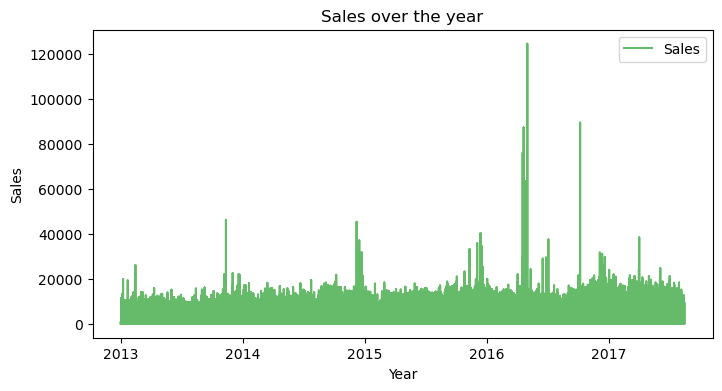

In [38]:
# Data Visualization on sales
plt.figure(figsize=(8, 4))
plt.plot(df['date'], df['sales'],label='Sales',color='#66BB6A')
plt.title('Sales over the year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

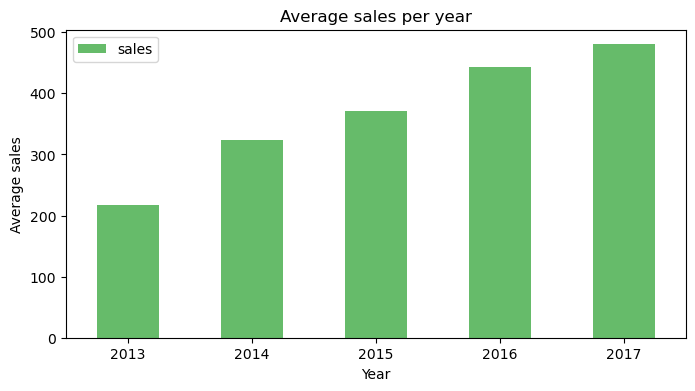

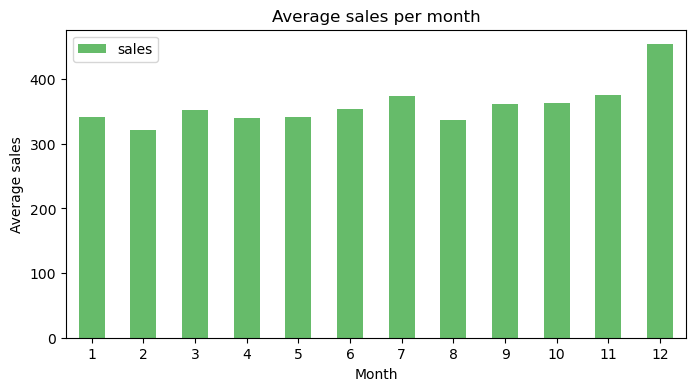

In [39]:
# Visualize average sales per year
plt.figure(figsize=(8,4))
df.groupby('year')['sales'].mean().plot(kind='bar', color='#66BB6A')
plt.title('Average sales per year')
plt.xlabel('Year')
plt.ylabel('Average sales')
plt.xticks(rotation=0)
plt.legend()
plt.show()

# Visualize average sales per month
plt.figure(figsize=(8,4))
df.groupby('month')['sales'].mean().plot(kind='bar', color='#66BB6A')
plt.title('Average sales per month')
plt.xlabel('Month')
plt.ylabel('Average sales')
plt.xticks(rotation=0)
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

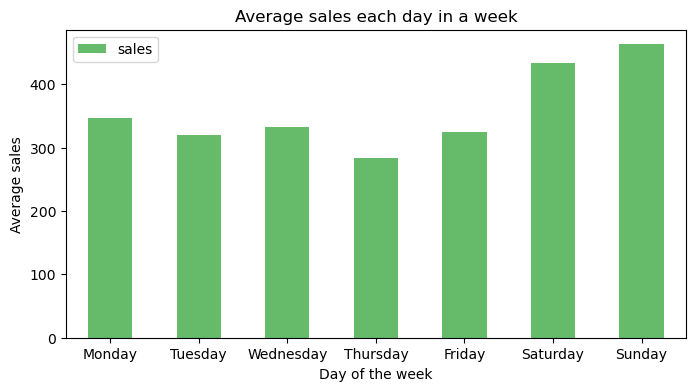

In [40]:
# average sales in each day
plt.figure(figsize=(8,4))
df.groupby('day_of_week')['sales'].mean().plot(kind='bar', color='#66BB6A')
plt.title('Average sales each day in a week')
plt.xlabel('Day of the week')
plt.ylabel('Average sales')
plt.xticks([0,1,2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation=0)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

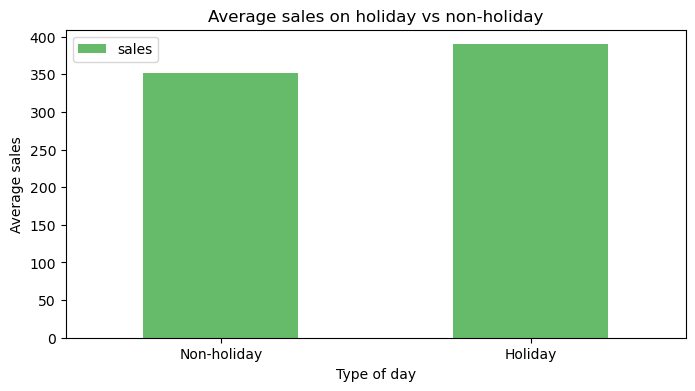

In [41]:
# Difference between average sales on holiday vs non-holiday
# create a column for sales on holiday
df['is_holiday']= df['date'].isin(holiday['date'])
# visualization
plt.figure(figsize=(8,4))
df.groupby('is_holiday')['sales'].mean().plot(kind='bar', color='#66BB6A')
plt.title('Average sales on holiday vs non-holiday')
plt.xlabel('Type of day')
plt.ylabel('Average sales')
plt.xticks([0,1], ['Non-holiday','Holiday'], rotation=0)
plt.legend()
plt.show


In [42]:
# create new column named 'city' in df
df_city = pd.merge(df,stores[['store_nbr','city']], on='store_nbr', how='left')

<function matplotlib.pyplot.show(close=None, block=None)>

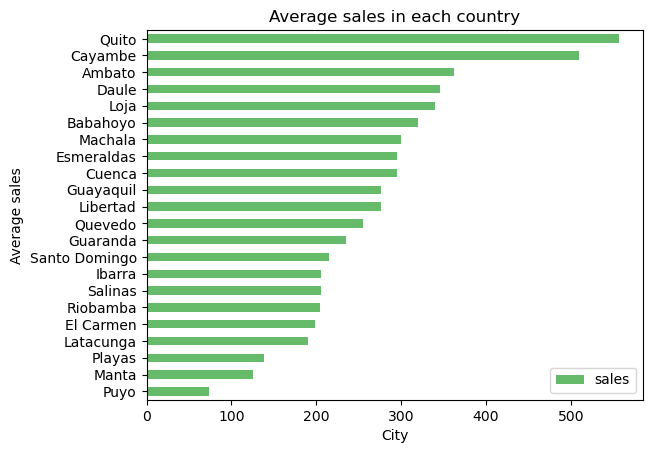

In [43]:
# average sales each city
df_city.groupby('city')['sales'].mean().sort_values().plot(kind='barh', color='#66BB6A')
plt.title('Average sales in each country')
plt.xlabel('City')
plt.ylabel('Average sales')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

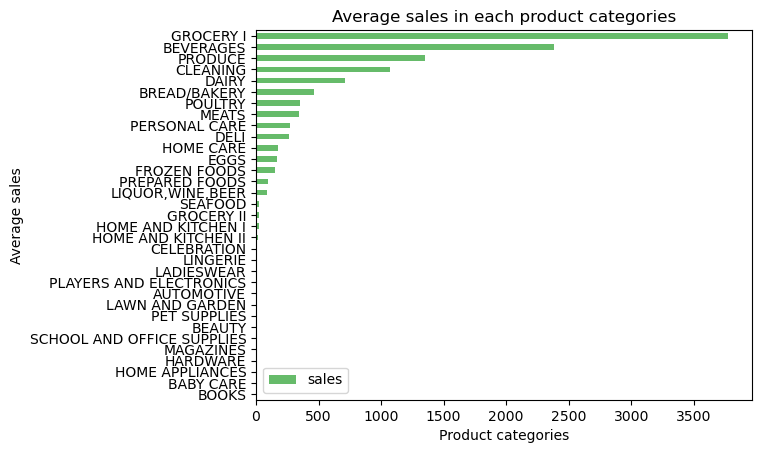

In [44]:
# average sales each category of products
df.groupby('family')['sales'].mean().sort_values().plot(kind='barh', color='#66BB6A')
plt.title('Average sales in each product categories')
plt.xlabel('Product categories')
plt.ylabel('Average sales')
plt.legend()
plt.show

# 4. Data modelling

4.1 Random Forest Regressor Method

In [74]:
# specify the prediction target
y=train['sales']

In [46]:
# the predictive features are oil, holiday, day of the week. 
# data = pd.date_range('2013-01-01', '2017-08-31')
factors = pd.DataFrame(pd.date_range('2013-01-01', '2017-08-31'),columns=['date'])

# add oil data to the dataframe
oil['date'] = pd.to_datetime(oil['date'], format='%Y-%m-%d')
factors = pd.merge(factors,oil, how='left',on='date')

factors['dcoilwtico'].fillna(method='ffill', inplace=True) #propagate last valid observation forward to next valid.
factors['dcoilwtico'].fillna(method='bfill', inplace=True) #use next valid observation to fill gap.

In [47]:
# add holiday (bool) and day of week to the dataframe
factors = pd.merge(factors,df[['date','is_holiday','day_of_week']], how='left',on='date')

In [48]:
factors.isnull().sum()

date           0
dcoilwtico     0
is_holiday     4
day_of_week    4
dtype: int64

In [49]:
factors[factors['is_holiday'].isna()]

,date,dcoilwtico,is_holiday,day_of_week
637956,2013-12-25,98.87,NaN,NaN
1286605,2014-12-25,55.70,NaN,NaN
1935254,2015-12-25,37.62,NaN,NaN
2585685,2016-12-25,52.01,NaN,NaN


In [50]:
factors['day_of_week'] = factors['date'].dt.dayofweek
factors['is_holiday']= factors['date'].isin(holiday['date'])
factors.isnull().sum()
factors= factors.drop_duplicates()

In [81]:
factors.head()

,date,dcoilwtico,is_holiday,day_of_week
0,2013-01-01,93.14,True,1
1782,2013-01-02,93.14,False,2
3564,2013-01-03,92.97,False,3
5346,2013-01-04,93.12,False,4
7128,2013-01-05,93.12,True,5


Model Validation

In [59]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')
# merge train and test df with factors df
test_merged = pd.merge(test,factors.set_index('date'),how='left',on='date')
test_merged = test_merged.drop(columns=['id','onpromotion','family'])
print(test_merged.columns)

Index(['date', 'store_nbr', 'dcoilwtico', 'is_holiday', 'day_of_week'], dtype='object')


In [60]:
test_merged['date'] = test_merged['date'].dt.strftime("%Y%m%d").astype(int)

In [82]:
test_merged.head()

,date,store_nbr,dcoilwtico,is_holiday,day_of_week
0,20170816,1,46.8,False,2
1,20170816,1,46.8,False,2
2,20170816,1,46.8,False,2
3,20170816,1,46.8,False,2
4,20170816,1,46.8,False,2


In [61]:
# change datatype on train df from int64 to int32
# train[['id','store_nbr','onpromotion']] = train[['id','store_nbr','onpromotion']].astype(np.int8)
# train['sales'] = train['sales'].astype(np.float32)
train_merged = pd.merge(train,factors.set_index('date'),how='left',on='date')
train_merged=train_merged.drop(columns=['id','sales','onpromotion','family'])
print(train_merged.columns)

Index(['date', 'store_nbr', 'dcoilwtico', 'is_holiday', 'day_of_week'], dtype='object')


In [62]:
train_merged['date'] = train_merged['date'].dt.strftime("%Y%m%d").astype(int)

In [83]:
train_merged.head()

,date,store_nbr,dcoilwtico,is_holiday,day_of_week
0,20130101,1,93.14,True,1
1,20130101,1,93.14,True,1
2,20130101,1,93.14,True,1
3,20130101,1,93.14,True,1
4,20130101,1,93.14,True,1


In [77]:
# Import the train_test_split function and uncomment
from sklearn.model_selection import train_test_split

# split train dataframe into 2
train_X, val_X, train_y, val_y = train_test_split(train_merged,y, random_state=1)

In [78]:
# import package random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# define the model
rf_model = RandomForestRegressor(n_estimators=30,n_jobs=-1,random_state=1)
# fit your model
rf_model.fit(train_X,train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mae = mean_absolute_error(val_y, rf_model.predict(val_X))

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 499.0907774353989


Test the model to 'test' dataframe

In [79]:
# X(predictive features) = train_merged
# y(specify prediction target) = train['sales']


# fit your model to 'test' dataframe
rf_model.fit(train_merged,y)
# apply model prediction to test dataframe 
prediction= rf_model.predict(test_merged)


Export submission.csv as output for Kaggle competition

In [80]:
# add prediction result to sales column in submission df
submission = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\sample_submission.csv")
submission['sales'] = prediction
submission.to_csv('submission.csv', index=False)

In [84]:
submission.head()

,id,sales
0,3000888,402.139642
1,3000889,402.139642
2,3000890,402.139642
3,3000891,402.139642
4,3000892,402.139642
